<a href="https://colab.research.google.com/github/0aras/ml_test_apps/blob/main/Exercise_3_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import torch
from torch import nn
from sklearn.datasets import make_moons

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split




In [61]:
N_SAMPLES=1000
RANDOM_SEED=42
X, y=make_moons(n_samples=N_SAMPLES,noise=0.09,random_state=RANDOM_SEED)

X.shape, y.shape


((1000, 2), (1000,))

In [62]:
df=pd.DataFrame({"X0":X[:,0],
                 "X1" :X[:,1],
                 "y":y})
df.head()

,X0,X1,y
0,-0.045450,0.436596,1
1,1.020954,-0.427458,1
2,0.875125,-0.279166,1
3,0.306553,-0.438342,1
4,-0.835136,0.534163,0


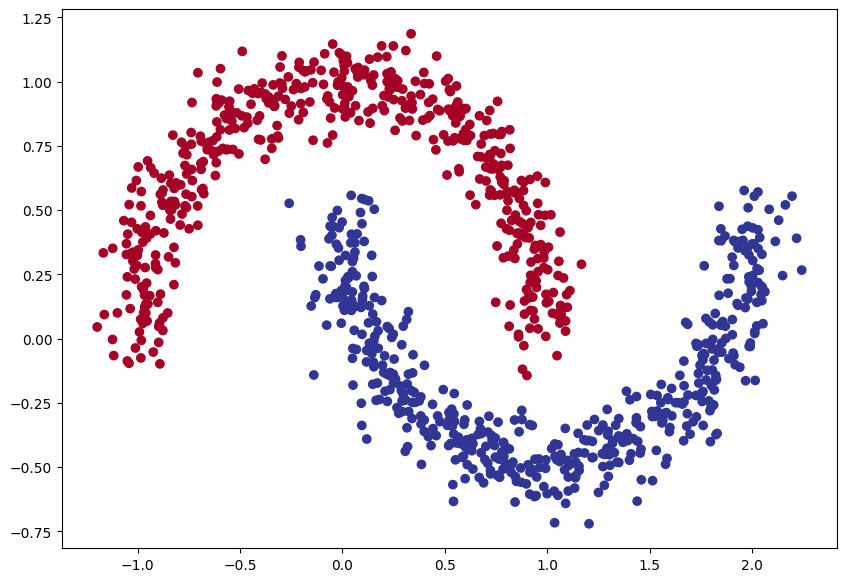

In [63]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=y_moons, cmap=plt.cm.RdYlBu)

In [64]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED)

len(X_train), len(y_test)

device="cuda" if torch.cuda.is_available() else "cpu"

In [65]:
class MoonClassify_0(nn.Module):
  def __init__(self, inp_features,outp_features,hidden_layers):
    super().__init__()
    self.layer_1=nn.Linear(in_features=inp_features,out_features=hidden_layers)

    self.layer_2=nn.Linear(in_features=hidden_layers,out_features=hidden_layers)

    self.layer_3=nn.Linear(in_features=hidden_layers,out_features=outp_features)

    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_0=MoonClassify_0(inp_features=2,
                       outp_features=1,
                       hidden_layers=10).to(device)

model_0

MoonClassify_0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [66]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1548, -0.3272],
                      [-0.4705,  0.3911],
                      [ 0.3579,  0.1666],
                      [ 0.1876, -0.4760],
                      [-0.4817,  0.6276],
                      [-0.6332, -0.0249],
                      [-0.2711,  0.0723],
                      [ 0.5430, -0.1415],
                      [-0.4189, -0.3596],
                      [ 0.4657,  0.4348]])),
             ('layer_1.bias',
              tensor([ 0.1695, -0.2106,  0.3271,  0.0737,  0.3512,  0.0567, -0.6148, -0.1230,
                      -0.3370, -0.1226])),
             ('layer_2.weight',
              tensor([[-0.1426, -0.0766,  0.1265, -0.1832,  0.2980, -0.1109, -0.0441, -0.0691,
                        0.2047, -0.0173],
                      [-0.0120, -0.2453, -0.2009,  0.2530, -0.0514,  0.1930, -0.0155, -0.1248,
                       -0.0234, -0.2457],
                      [-0.2890,  0.0997, -0.3088, -0.1804,  0.1038, -0.2

In [70]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [68]:
#Pre Control
y_first=model_0(X_train[:10]).squeeze()
print(y_first)

y_first_prob=torch.sigmoid(y_first)
print(y_first_prob)

y_labels=torch.round(torch.sigmoid(y_first_prob))
print(y_labels)



tensor([-0.0362, -0.1372, -0.1511, -0.1495, -0.1191, -0.1496, -0.1101, -0.1274,
        -0.1271, -0.1302], grad_fn=<SqueezeBackward0>)
tensor([0.4909, 0.4658, 0.4623, 0.4627, 0.4703, 0.4627, 0.4725, 0.4682, 0.4683,
        0.4675], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [57]:
!pip -q install torchmetrics
from torchmetrics import Accuracy

acc_fn=Accuracy(task="multiclass", num_classes=2).to(device)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00


In [86]:
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
  model_0.train()

  y_logits=model_0(X_train).squeeze()
  y_pred_probs=torch.sigmoid(y_logits)
  y_pred=torch.round(y_pred_probs)

  loss=loss_fn(y_logits,y_train)
  acc=acc_fn(y_pred,y_train.int())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
#TESTING
  model_0.eval()
  #test forward pass(fit test values to the model)
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    #test loss( measure estimated test values with loss_fn and acc_fn methods)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=acc_fn(test_pred,y_test.int())
    if epoch % 100==0:
      print(f"EPOCH {epoch}|LOSS: {loss:.2f}|ACC: {acc:.2f}| TEST LOSS: {test_loss:.2f}|TEST ACC: {test_acc:.2f}")


EPOCH 0|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.01|TEST ACC: 1.00
EPOCH 100|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.01|TEST ACC: 1.00
EPOCH 200|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 300|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 400|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 500|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 600|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 700|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 800|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00
EPOCH 900|LOSS: 0.01|ACC: 1.00| TEST LOSS: 0.00|TEST ACC: 1.00


In [72]:
import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



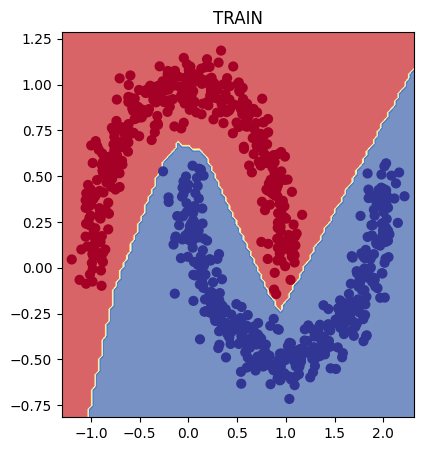

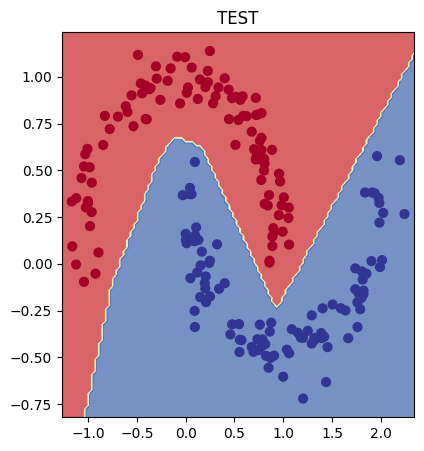

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("TRAIN")
plot_decision_boundary(model_0,X_train, y_train)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("TEST")
plot_decision_boundary(model_0,X_test,y_test)


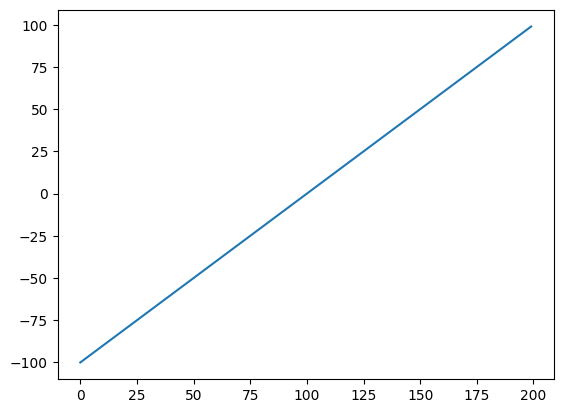

In [76]:
tensor_I=torch.arange(-100,100,1)
plt.plot(tensor_I)

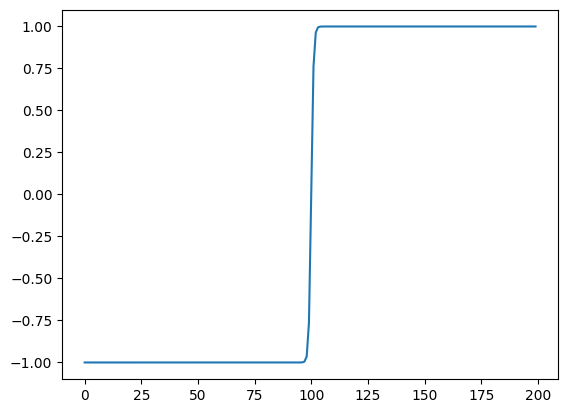

In [77]:
plt.plot(torch.tanh(tensor_I))

In [82]:
def tanh(x):
  return (torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x))


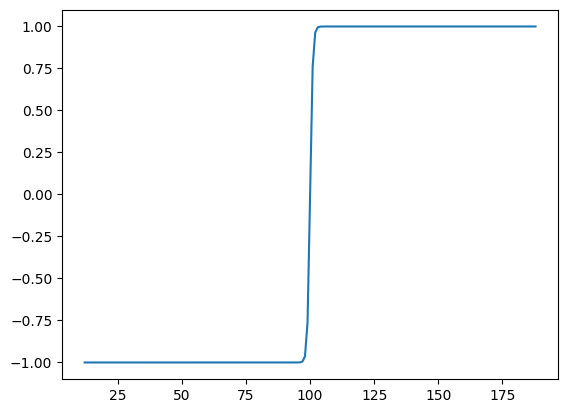

In [83]:
plt.plot(tanh(tensor_I))